# 

# NOT FOR INCLUSION - DATA PREPROCESSING --------------------------------------

In [ ]:
# from matplotlib import image
# import matplotlib.pyplot as plt
# import numpy as np
# from skimage.io import imsave

# # load image as pixel array
# images = [2,3,4,8]

# for num in images:
#     im = image.imread(f"./data/B0{num}.jp2")
#     im_out = im[0:1000,0:1000]/2**12
#     imsave(f'./data/B0{num}.png',im_out)

In [ ]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

# load image as pixel array
images = [2, 3, 4, 8]

perc = 1
for num in images:
    im = image.imread(f"./data/B0{num}.png")
    fig, ax = plt.subplots(figsize=(15, 15))
    percentiles = np.percentile(im, [perc, 100 - perc])
    ax.imshow(im, cmap="Greys_r", vmin=percentiles[0], vmax=percentiles[1])

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
im = image.imread(f"./data/B03.png")
percentiles = np.percentile(im, [perc, 100 - perc])
ax.imshow(im, cmap="Greys_r", vmin=percentiles[0], vmax=percentiles[1])
plt.show()

# --------------------------------------------------

# Exercise: Viewing the world in new ways using remote sensing data
We discussed in our last section that natural color imagery is based on three color bands: red, green, and blue, which each correspond to the measurements of a sensor (i.e. a camera) collecting information on the wavelengths of light that correspond to the colors red (625-750 nm), green (500-565nm), and blue (450-485nm). These are the colors our built-in sensors (eyeballs) can detect. However, there are many other wavelengths to explore. Frequently, when we're working with remote sensing data from satellites, we do not solely care about RGB data, but also infrared data that measures light around 840nm in wavelength. Near-infrared (NIR) data can be exceptionally informative for learning about the presence and health of vegetation which can be useful for agriculture as well as understanding the degree of urban development in a region.

In this exercise, you'll explore how we can work with matrices to gain more information about vegetation in a region using a collection of satellite imagery from Kansas, USA from the Sentinel-2 instrument of the European Space Administration (ESA). You can explore publicly available ESA data at https://scihub.copernicus.eu/dhus/.

Let's take a look at each band individually, then the RGB bands together for a standard natural color image. From there we'll take a look at a false color infrared image which will provide information on the relative health of the vegetation. Lastly, we'll explore the normalized difference vegetation index (NDVI) which is used to quantify the amount of vegetation present in a region.

We'll get started by loading are data as a set of three separate matrices representing the red, blue, green, and NIR bands of our data. Here's the code to get you started. This code loads four numpy arrays, one for red, green, blue, and NIR: `band2_blue`, `band3_green`, `band4_red`, and `band8_nir`.

In [1]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

# Load the data from each of the four bands
band2_blue = image.imread(f"./data/B02.png")
band3_green = image.imread(f"./data/B03.png")
band4_red = image.imread(f"./data/B04.png")
band8_nir = image.imread(f"./data/B08.png")

1. Now that you have the data loaded, let's verify we can see each of the bands individually in grayscale (remember, it's combining them together that will give them color). Using the function `plot_image` below, plot each of the four bands independently and note any similarities or differences.

In [ ]:
def plot_image(im, colormap="Greys_r"):
    """Plots either a single band or a 3-band image, depending on whether `im` is 2-D or 3-D
    For single band images, you can specify the colormap or the default of 'Greys_r' is chosen.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    perc = 5
    percentiles = np.percentile(im, [perc, 100 - perc])
    if im.ndim == 3:
        ax.imshow(
            im * 3
        )  # The mutiplication increases the image brightness for easier viewing
    elif im.ndim == 2:
        ax.imshow(im, cmap=colormap, vmin=percentiles[0], vmax=percentiles[1])
    plt.show()

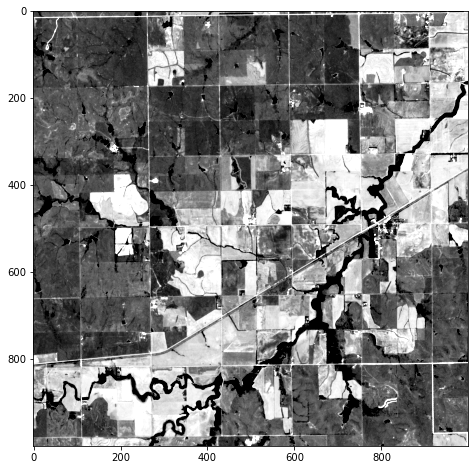

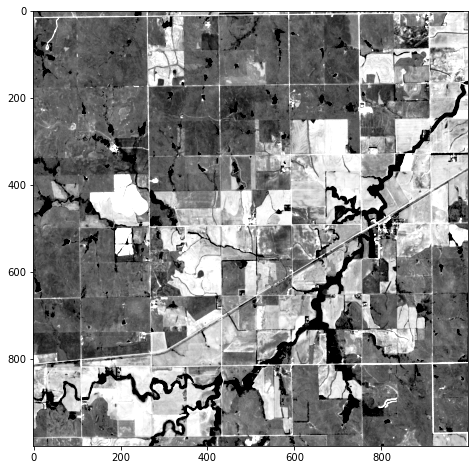

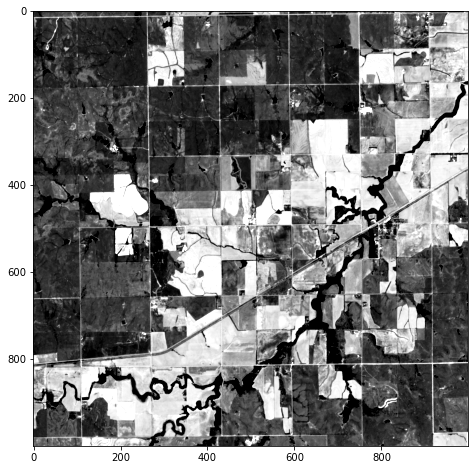

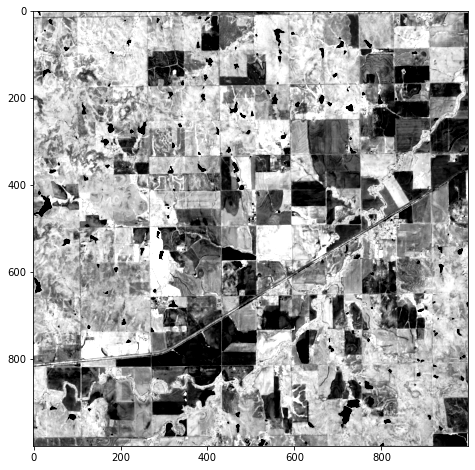

In [4]:
### SOLUTION - DO NOT POST ###
bands = [band2_blue, band3_green, band4_red, band8_nir]
for im in bands:
    plot_image(im)

2.  Next, let's look at the natural color imagery. You'll notice that each band is of shape (1000, 1000). This is a 2-D array. However, to make a color image, you'll need to make a 3-D array out of the channels in the correct order. We've explored some approaches to combining arrays of data together, but in this case, we want to add the data along a *new* dimension to make this a 3-D array from 2-D data. As a hint, check out the numpy [`stack` method](https://numpy.org/doc/stable/reference/generated/numpy.stack.html). Create your natural color image (which should be of shape ) and plot it using the `plot_image` function. What can you see in the image? Are there any interesting features like bodies of water, populated areas, farms, etc.?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


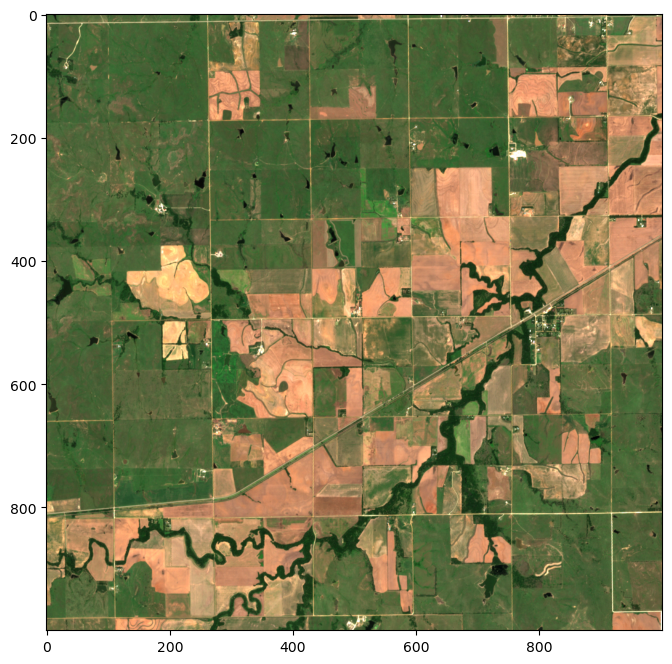

In [ ]:
### SOLUTION - DO NOT POST ###
im_natural_color = np.stack((band4_red, band3_green, band2_blue), axis=-1)
plot_image(im_natural_color)

3. Now we start to get to even more interesting ways of plotting the image. Let's plot a false-color infrared image. What this means is that instead of putting "red" where "red" should be in a natural color RGB image and "blue" where "blue" should be, we mix them up in a way that gives us useful information about our data. Let's construct a 3-D array with the NIR band first, the red band second, and the green band third; that is (Band 8, Band 4, Band 3) in the places where RGB normally would be found. Plot that array using the `plot_image` function. 

When viewing this image, what you'll notice is that healthiest vegetation should be closer to red and the more urban areas should be closer to white. How does this image compare to the natural color image?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


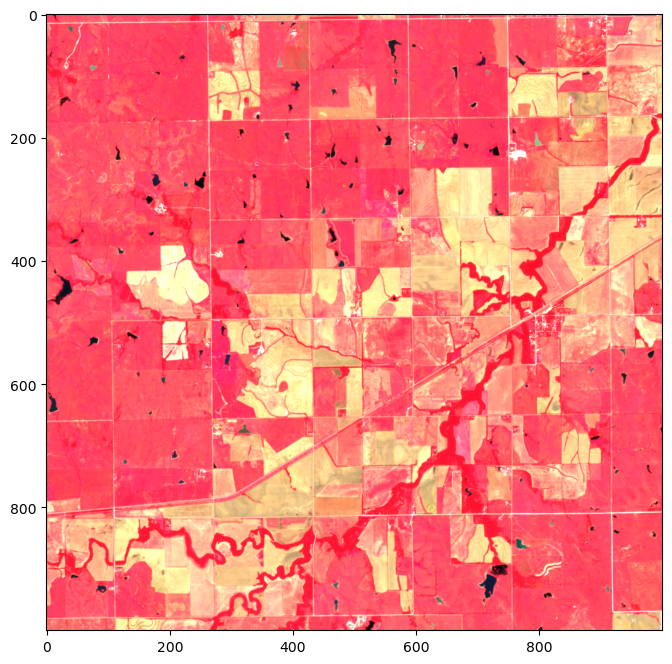

In [ ]:
### SOLUTION - DO NOT POST ###
im_false_color = np.stack((band8_nir, band4_red, band3_green), axis=-1)
plot_image(im_false_color)

4. Lastly, there is also an index we can calculate that tells about the amount of vegetation present in a region. This index is called the normalized difference vegetation index, or NDVI. The formula for calculating NDVI is:
$$NDVI = \frac{B8 - B4}{B8 + B4}$$
Calculate this and plot the single band using `plot_image` with the 'PiYG' colormap. In this case, the more green - the greater the vegetation present, the brighter the green. Which of these different options seems most informative about vegetation? Which presentation of the data did you learn most about the region from?

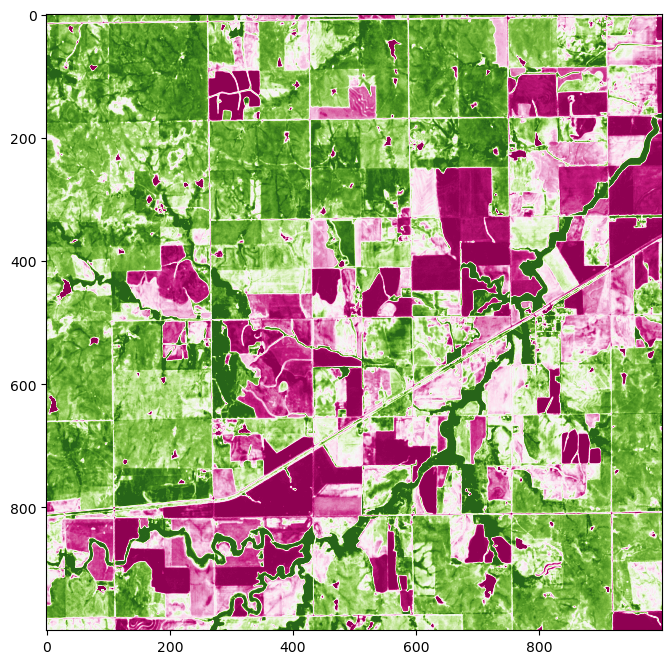

In [ ]:
### SOLUTION - DO NOT POST ###
ndvi = (band8_nir - band4_red) / (band8_nir + band4_red)
plot_image(ndvi, colormap="PiYG")